In [9]:
!pip install --upgrade tables
!pip install eli5

Requirement already up-to-date: tables in /usr/local/lib/python3.6/dist-packages (3.6.1)


In [0]:
import pandas as pd
import numpy as np

from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score

import eli5
from eli5.sklearn import PermutationImportance

Data import:

In [14]:
cd '/content/drive/My Drive/Colab Notebooks/Dataworshop_matrix/matrix_two/dw_matrix_car'

/content/drive/My Drive/Colab Notebooks/Dataworshop_matrix/matrix_two/dw_matrix_car


In [15]:
ls

2_day1_meta.ipynb           2_day3_simple_model.ipynb  LICENSE
2_day2_visualization.ipynb  data/                      README.md


In [16]:
df = pd.read_hdf('data/car.h5')
df.shape

(106494, 155)

In [18]:
df.columns

Index(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       ...
       'param_pearl', 'param_stan', 'param_wersja', 'param_emisja-co2',
       'param_body-type', 'param_matowy', 'param_bezwypadkowy',
       'param_akryl-(niemetalizowany)', 'param_monthly-payment-value',
       'car_id'],
      dtype='object', length=155)

Dummy model (benchmark):

In [19]:
df.select_dtypes(np.number).columns

Index(['price_value', 'car_id'], dtype='object')

In [21]:
X = df[['car_id']].values
y = df['price_value'].values

model = DummyRegressor()
model.fit(X, y)
y_pred = model.predict(X)

mae(y, y_pred)

39465.934630440985

In [22]:
[x for x in df.columns if 'price' in x]

['price_currency', 'price_details', 'price_value']

In [23]:
df['price_currency'].value_counts(normalize=True) * 100

PLN    99.80844
EUR     0.19156
Name: price_currency, dtype: float64

In [25]:
df[df['price_currency'] != 'EUR']
df.shape

(106494, 155)

Features:

In [39]:
df['param_rok-produkcji'].factorize()[1]

Index(['2018', '2011', '2015', '2009', '2017', '2012', '2013', '2007', '2001',
       '2016', '2006', '2008', '2004', '1999', '2000', '2010', '2005', '2002',
       '1998', '2014', '2003', '1982', '1995', '1997', '1992', '1993', '1994',
       '1996', '1989', '1988', '1967', '1987', '1970', '1959', '1990', '1991',
       '1974', '1975', '1973', '1953', '1985', '1984', '1986', '1981', '1979',
       '1960', '1983', '1978', '1964', '1980', '1972', '1969', '1956', '1966',
       '1977', '1962', '1965', '1971', '1963', '1961', '1952', '1949', '1976',
       '1937', '1968', '1958', '1955', '1933', '1929', '1957', '1944', '1954',
       '1932', '1936', '1947', '1948'],
      dtype='object')

In [0]:
SUFFIX_CAT = '__cat'

for feat in df.columns:
  if isinstance(df[feat][0], list): continue

  factorized_values = df[feat].factorize()[0]
  if SUFFIX_CAT in feat:
    df[feat] = factorized_values
  else:
    df[feat + SUFFIX_CAT] = factorized_values

In [28]:
cat_feats = [x for x in df.columns if SUFFIX_CAT in x]
cat_feats = [x for x in cat_feats if 'price' not in x]
len(cat_feats)

151

In [30]:
X = df[cat_feats].values
y = df['price_value'].values

model = DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
np.mean(scores)

-19695.13091100928

In [32]:
m = DecisionTreeRegressor(max_depth=5)
m.fit(X, y)

imp = PermutationImportance(m).fit(X, y)
eli5.show_weights(imp, feature_names=cat_feats)

Weight,Feature
0.2535 ± 0.0038,param_napęd__cat
0.2033 ± 0.0052,param_stan__cat
0.1992 ± 0.0055,param_faktura-vat__cat
0.1443 ± 0.0073,param_rok-produkcji__cat
0.0648 ± 0.0027,param_moc__cat
0.0415 ± 0.0015,feature_kamera-cofania__cat
0.0385 ± 0.0012,param_skrzynia-biegów__cat
0.0262 ± 0.0016,param_marka-pojazdu__cat
0.0187 ± 0.0012,param_pojemność-skokowa__cat
0.0162 ± 0.0003,feature_bluetooth__cat


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ef0009e80>,
      dtype=object)

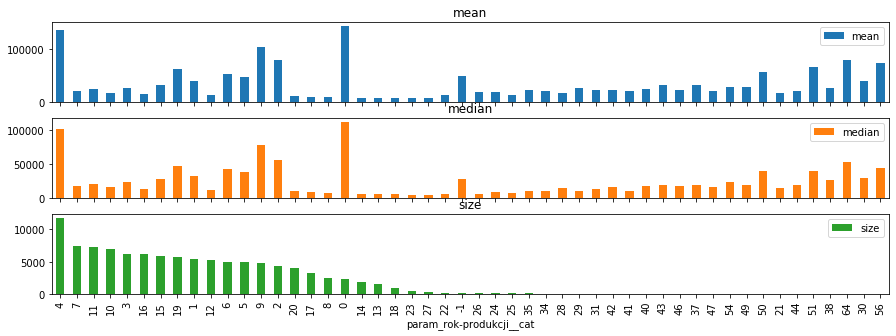

In [35]:
draw_data_values('param_rok-produkcji__cat')

In [0]:
def draw_data_values(feat_groupby, feat_agg='price_value', 
                     agg_func=[np.mean, np.median, np.size], feat_sort='size', 
                     top=50, subplots=True):
  
  return (
    df.groupby(feat_groupby)[feat_agg]
    .agg(agg_func)
    .sort_values(by=feat_sort, ascending=False)
    .head(top)
    .plot(kind='bar', figsize=(15,5), subplots=subplots)
  )

# 'param_marka-pojazdu'
# 'price_value'